In [13]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [14]:
# read in data on US stats for 2015
usa_dataframe = pd.read_csv('UpdatedState2015.csv') # data for selected categories per state
death_dataframe = pd.read_csv('the-counted-2015.csv') # national data specific to police-related deaths

In [15]:
# for debugging
# print(usa_dataframe)
print(death_dataframe)

       uid                       name age  gender           raceethnicity  \
0        2            Matthew Ajibade  22    Male                   Black   
1        4               Lewis Lembke  47    Male                   White   
2        5          Michael Kocher Jr  19    Male                   White   
3        6              John Quintero  23    Male         Hispanic/Latino   
4        7                Tim Elliott  53    Male  Asian/Pacific Islander   
5        8            Matthew Hoffman  32    Male                   White   
6        9               Kenneth Buck  22    Male         Hispanic/Latino   
7       10          Michael Rodriguez  39    Male         Hispanic/Latino   
8       11             Patrick Wetter  25    Male                   White   
9       12              Brian Pickett  26    Male                   Black   
10      13              Autumn Steele  34  Female                   White   
11      14              Brock Nichols  35    Male                   White   

In [16]:
# unused, parses out data on gender of victims, but pd.crosstab() gives cleaner result
# dfstate = death_dataframe.groupby(['gender','state']).size()

# parse out data on gender of victims by state
df_gender_state = pd.crosstab(death_dataframe.state, death_dataframe.gender)
# create stacked bar graph for all states
# df_gender_state.plot(kind='bar', stacked=True)

In [152]:
# group data by states to count number of unique IDs which corresponds to deaths
dfstate_sum = death_dataframe.groupby('state').uid.nunique()
# sort values from largest to smallest
sorted_df = dfstate_sum.sort_values(ascending=[False])
# list top 10 states
sorted_df.nlargest(10) # result -> top 10 states: CA, TX, FL, AZ, GA, OK, OH, CO, LA, NY

state
CA    211
TX    112
FL     71
AZ     44
GA     39
OK     37
OH     36
CO     32
LA     27
NY     27
Name: uid, dtype: int64

state
CA    211
TX    112
FL     71
AZ     44
GA     39
OK     37
OH     36
CO     32
LA     27
NY     27
dtype: int64

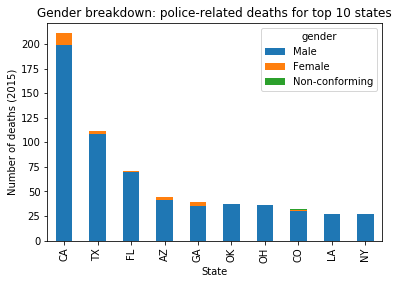

In [154]:
# now, parse out data for just top 10 states (number of deaths)
top10 = df_gender_state.loc[['CA', 'TX', 'FL', 'AZ', 'GA', 'OK', 'OH', 'CO', 'LA', 'NY'],:]
# reorder the data for creating bar chart
top10_reordered = top10.loc[:,['Male','Female', 'Non-conforming']]
# create stacked bar chart
fig = top10_reordered.plot(kind='bar', stacked=True)
# generate labels
plt.ylabel('Number of deaths (2015)')
plt.xlabel('State')
plt.title('Gender breakdown: police-related deaths for top 10 states')
plt.savefig('gender_hist.png')

In [156]:
totals_per_state = top10_reordered.sum(axis=1) # find how many (total) of each ethnicity killed in top 10 states
states = ['CA', 'TX', 'FL', 'AZ', 'GA', 'OK', 'OH', 'CO', 'LA', 'NY'] # parsed from previous code
genders = ['Male', 'Female', 'Non-conforming'] # major selected ethnicities
from __future__ import division # to convert int division to float
gender_ratios = [] # declare vector of ratios

# calculate ratio of police-related deaths over the total per state
for gender in genders:
        gender_ratios.append(top10_reordered[gender]/totals_per_state)

[state
 CA    0.943128
 TX    0.973214
 FL    0.985915
 AZ    0.931818
 GA    0.897436
 OK    1.000000
 OH    1.000000
 CO    0.937500
 LA    1.000000
 NY    1.000000
 dtype: float64, state
 CA    0.056872
 TX    0.026786
 FL    0.014085
 AZ    0.068182
 GA    0.102564
 OK    0.000000
 OH    0.000000
 CO    0.031250
 LA    0.000000
 NY    0.000000
 dtype: float64, state
 CA    0.00000
 TX    0.00000
 FL    0.00000
 AZ    0.00000
 GA    0.00000
 OK    0.00000
 OH    0.00000
 CO    0.03125
 LA    0.00000
 NY    0.00000
 dtype: float64]

In [36]:
# print(top10_reordered)

gender  Male  Female  Non-conforming
state                               
CA       199      12               0
TX       109       3               0
FL        70       1               0
AZ        41       3               0
GA        35       4               0
OK        37       0               0
OH        36       0               0
CO        30       1               1
LA        27       0               0
NY        27       0               0


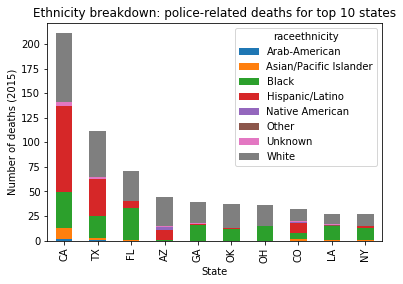

In [150]:
# parse out data on race of victims by state
df_race = pd.crosstab(death_dataframe.state, death_dataframe.raceethnicity)
# retrieve top 10 states
df_race_10 = df_race.loc[['CA', 'TX', 'FL', 'AZ', 'GA', 'OK', 'OH', 'CO', 'LA', 'NY'],:]
# plot stacked bar chart
df_race_10.plot(kind='bar', stacked=True)
# generate labels
plt.xlabel('State')
plt.ylabel('Number of deaths (2015)')
plt.title('Ethnicity breakdown: police-related deaths for top 10 states')
plt.savefig('ethinicity_hist.png')

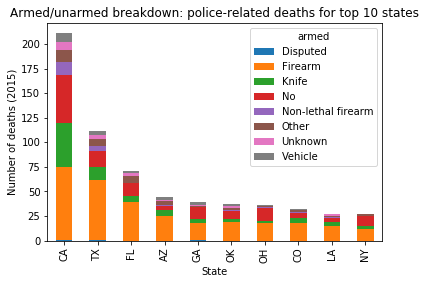

In [151]:
# parse out data on gender of victims by state
df_armed_state = pd.crosstab(death_dataframe.state, death_dataframe.armed)
df_armed_10 = df_armed_state.loc[['CA', 'TX', 'FL', 'AZ', 'GA', 'OK', 'OH', 'CO', 'LA', 'NY'],:]
# plot stacked bar chart
df_armed_10.plot(kind='bar', stacked=True)
# generate labels
plt.xlabel('State')
plt.ylabel('Number of deaths (2015)')
plt.title('Armed/unarmed breakdown: police-related deaths for top 10 states')
plt.savefig('armed_hist.png')

In [149]:
totals_per_state = df_race_10.sum(axis=1) # find how many (total) of each ethnicity killed in top 10 states
states = ['CA', 'TX', 'FL', 'AZ', 'GA', 'OK', 'OH', 'CO', 'LA', 'NY'] # parsed from previous code
races = ['Black', 'White', 'Hispanic/Latino'] # major selected ethnicities
from __future__ import division # to convert int division to float
ratios = [] # declare vector of ratios

# calculate ratio of police-related deaths over the total per state
for race in races:
        ratios.append(df_race_10[race]/totals_per_state)

[state
 CA    0.170616
 TX    0.196429
 FL    0.450704
 AZ    0.022727
 GA    0.410256
 OK    0.324324
 OH    0.416667
 CO    0.187500
 LA    0.518519
 NY    0.444444
 dtype: float64, state
 CA    0.331754
 TX    0.419643
 FL    0.436620
 AZ    0.659091
 GA    0.538462
 OK    0.648649
 OH    0.583333
 CO    0.375000
 LA    0.370370
 NY    0.444444
 dtype: float64, state
 CA    0.417062
 TX    0.339286
 FL    0.098592
 AZ    0.227273
 GA    0.025641
 OK    0.027027
 OH    0.000000
 CO    0.312500
 LA    0.000000
 NY    0.074074
 dtype: float64]

[1, 2, 3, 4, 5, 6, 7, 8, 9]